In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Chemins des datasets
FOOD41_DIR = "/kaggle/input/food41/images"
RECIPES_DIR = "/kaggle/input/recipe-images-with-nutritional-information"

In [7]:
import os

# Chemin de base pour Kaggle input
input_dir = '/kaggle/input'

# Lister les dossiers disponibles
datasets = os.listdir(input_dir)
print("Datasets disponibles :", datasets)


Datasets disponibles : ['food101tfrecords', 'food41']


In [12]:
import os

# Chemin de base pour Kaggle input
input_dir = '/kaggle/input'

# Dossiers de datasets à explorer
datasets = ['food101tfrecords', 'food41']

# Lister le contenu des datasets
for dataset in datasets:
    dataset_path = os.path.join(input_dir, dataset)
    print(f"Contenu du dataset '{dataset}':")
    files = os.listdir(dataset_path)
    print(files)
    print("-" * 40)


Contenu du dataset 'food101tfrecords':
['food']
----------------------------------------
Contenu du dataset 'food41':
['meta', 'food_test_c101_n1000_r64x64x3.h5', 'food_c101_n10099_r32x32x3.h5', 'food_c101_n1000_r384x384x3.h5', 'food_test_c101_n1000_r128x128x3.h5', 'images', 'food_test_c101_n1000_r32x32x3.h5', 'food_test_c101_n1000_r32x32x1.h5', 'food_test_c101_n1000_r128x128x1.h5', 'food_c101_n10099_r64x64x1.h5', 'food_c101_n10099_r64x64x3.h5', 'food_test_c101_n1000_r64x64x1.h5', 'food_c101_n10099_r32x32x1.h5']
----------------------------------------


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

food41_dir = os.path.join(input_dir, 'food41/images')  # Mettre le bon chemin vers les images

# Création de l'objet ImageDataGenerator pour la normalisation des images
datagen_food41 = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)

# Chargement des données pour l'entraînement et la validation
train_data_food41 = datagen_food41.flow_from_directory(
    food41_dir,
    target_size=(150, 150),  # Taille des images
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_data_food41 = datagen_food41.flow_from_directory(
    food41_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)


Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


In [15]:
import tensorflow as tf

food101tfrecords_dir = os.path.join(input_dir, 'food101tfrecords')

# Charger les fichiers TFRecord
tfrecord_files = [os.path.join(food101tfrecords_dir, filename) for filename in os.listdir(food101tfrecords_dir) if filename.endswith('.tfrecords')]

# Exemple pour lire un fichier TFRecord
raw_dataset = tf.data.TFRecordDataset(tfrecord_files)

# Tu peux ensuite ajouter un parser pour le format de tes fichiers TFRecord


In [17]:
food41_dir = '/kaggle/input/food41'
files = os.listdir(food41_dir)
print("Fichiers dans le dossier food41:", files)


Fichiers dans le dossier food41: ['meta', 'food_test_c101_n1000_r64x64x3.h5', 'food_c101_n10099_r32x32x3.h5', 'food_c101_n1000_r384x384x3.h5', 'food_test_c101_n1000_r128x128x3.h5', 'images', 'food_test_c101_n1000_r32x32x3.h5', 'food_test_c101_n1000_r32x32x1.h5', 'food_test_c101_n1000_r128x128x1.h5', 'food_c101_n10099_r64x64x1.h5', 'food_c101_n10099_r64x64x3.h5', 'food_test_c101_n1000_r64x64x1.h5', 'food_c101_n10099_r32x32x1.h5']


In [19]:
import h5py

# Chemin du fichier HDF5
h5_file = '/kaggle/input/food41/food_c101_n1000_r384x384x3.h5'  # Par exemple, remplace ce chemin par celui que tu souhaites explorer

with h5py.File(h5_file, 'r') as f:
    # Afficher les noms des groupes et datasets dans le fichier HDF5
    print(f.keys())


<KeysViewHDF5 ['category', 'category_names', 'images']>


In [20]:
import h5py

# Chemin du fichier HDF5
h5_file = '/kaggle/input/food41/food_c101_n1000_r384x384x3.h5'

with h5py.File(h5_file, 'r') as f:
    # Afficher les clés principales
    print("Clés principales:", f.keys())
    
    # Explorer le groupe 'category'
    category_data = f['category']
    print("Données dans 'category':", category_data.shape, category_data[:10])  # Afficher les 10 premières données
    
    # Explorer le groupe 'category_names'
    category_names_data = f['category_names']
    print("Noms des catégories:", category_names_data[:10])  # Afficher les 10 premiers noms
    
    # Explorer le groupe 'images'
    images_data = f['images']
    print("Données d'images:", images_data.shape)  # Afficher la forme des données d'images


Clés principales: <KeysViewHDF5 ['category', 'category_names', 'images']>
Données dans 'category': (1000, 101) [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
Noms des catégories: [b'apple_pie' b'baby_back_ribs' b'baklava' b'beef_carpaccio'
 b'beef_tartare' b'beet_salad' b'beignets' b'bibimbap' b'bread_pudding'
 b'breakfast_burrito']
Données d'images: (1000, 384, 384, 3)


In [23]:
import h5py

# Vérifie les groupes et datasets disponibles dans le fichier
with h5py.File(h5_file, 'r') as f:
    print(f.keys())  # Affiche les clés (groupes/datasets) disponibles


<KeysViewHDF5 ['category', 'category_names', 'images']>


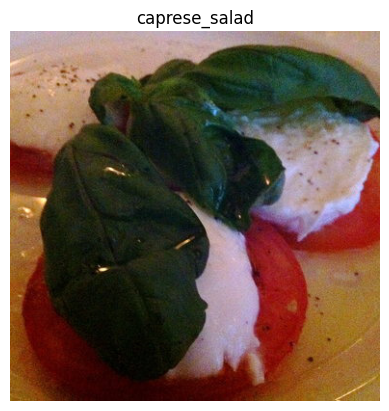

In [24]:
import h5py
import matplotlib.pyplot as plt

# Chemin du fichier HDF5
h5_file = '/kaggle/input/food41/food_c101_n1000_r384x384x3.h5'

with h5py.File(h5_file, 'r') as f:
    # Accéder à la première image et à sa catégorie
    image_data = f['images'][0]  # L'image à l'index 0
    category_data = f['category'][0]  # La catégorie associée à cette image
    category_names = f['category_names']  # Accéder aux noms des catégories

    # Afficher l'image
    plt.imshow(image_data)
    plt.title(category_names[category_data.argmax()].decode('utf-8'))  # Titre de l'image, nom de la catégorie
    plt.axis('off')
    plt.show()


Groupes disponibles dans le fichier HDF5 : <KeysViewHDF5 ['category', 'category_names', 'images']>


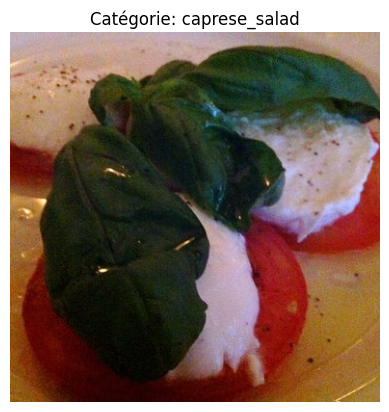

In [25]:
import h5py
import matplotlib.pyplot as plt

# Chemin du fichier HDF5
h5_file = '/kaggle/input/food41/food_c101_n1000_r384x384x3.h5'

with h5py.File(h5_file, 'r') as f:
    # Vérifier les groupes et datasets disponibles
    print("Groupes disponibles dans le fichier HDF5 :", f.keys())
    
    # Accéder à la première image et à sa catégorie
    image_data = f['images'][0]  # L'image à l'index 0
    category_data = f['category'][0]  # La catégorie associée à cette image
    category_names = f['category_names']  # Accéder aux noms des catégories
    
    # Trouver la catégorie de l'image (en supposant que 'category' est un tableau binaire)
    category_index = category_data.argmax()  # L'index de la catégorie
    category_name = category_names[category_index].decode('utf-8')  # Nom de la catégorie

    # Afficher l'image avec son titre (nom de la catégorie)
    plt.imshow(image_data)
    plt.title(f"Catégorie: {category_name}")  # Afficher le nom de la catégorie comme titre
    plt.axis('off')  # Masquer les axes
    plt.show()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 382, 382, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 191, 191, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 189, 189, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 94, 94, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 92, 92, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 46, 46, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 270848)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    34,668,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 101)            │        13,029 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,774,949 (132.66 MB)

 Trainable params: 34,774,949 (132.66 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 170s 7s/step - accuracy: 0.0053 - loss: 6.2613 - val_accuracy: 0.0200 - val_loss: 4.6151
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 144s 6s/step - accuracy: 0.0285 - loss: 4.6116 - val_accuracy: 0.0150 - val_loss: 4.6122
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 146s 6s/step - accuracy: 0.0678 - loss: 4.4091 - val_accuracy: 0.0050 - val_loss: 4.6779
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 141s 6s/step - accuracy: 0.3600 - loss: 3.2739 - val_accuracy: 0.0050 - val_loss: 5.6006
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 166s 7s/step - accuracy: 0.8552 - loss: 0.9211 - val_accuracy: 0.0150 - val_loss: 9.9149
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 142s 6s/step - accuracy: 0.9686 - loss: 0.2313 - val_accuracy: 0.0100 - val_loss: 11.5846
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 148s 6s/step - accuracy: 0.9924 - loss: 0.0723 - val_accuracy: 0.0050 - val_loss: 11.2975
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 143s 6s/step - accuracy: 0.9914 - loss: 0.0695 - val_accuracy: 0.0050 -

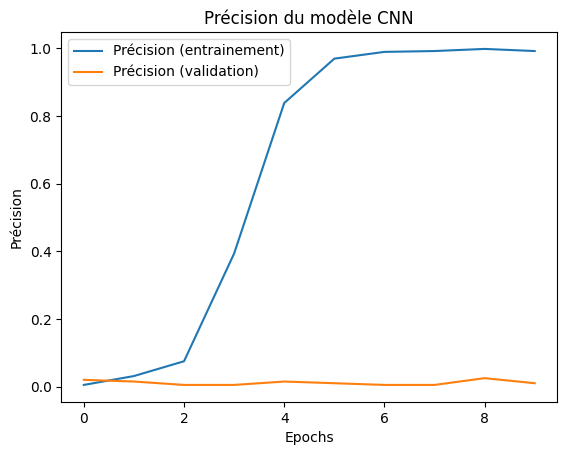

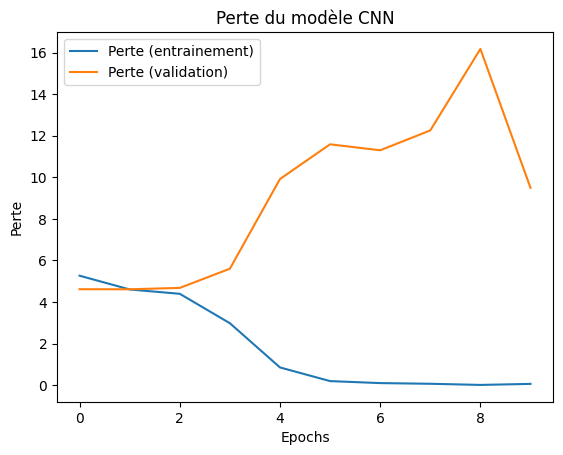

In [27]:
import h5py
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Chemin du fichier HDF5
h5_file = '/kaggle/input/food41/food_c101_n1000_r384x384x3.h5'

# Charger les données
with h5py.File(h5_file, 'r') as f:
    # Accéder aux images et aux catégories
    images = f['images'][:]
    categories = f['category'][:]
    category_names = f['category_names'][:]

# Normalisation des images
images = images / 255.0  # Normaliser les images entre 0 et 1

# Nombre de classes
num_classes = categories.shape[1]  # Correspond au nombre de catégories (101)

# Diviser les données en jeu d'entraînement et de validation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(images, categories, test_size=0.2, random_state=42)

# Construction du modèle CNN
model = models.Sequential()

# Ajouter les couches de convolution et de pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(384, 384, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Ajouter une couche de flattening
model.add(layers.Flatten())

# Ajouter une couche dense
model.add(layers.Dense(128, activation='relu'))

# Ajouter la couche de sortie avec une activation softmax pour la classification multiclasse
model.add(layers.Dense(num_classes, activation='softmax'))

# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])  # Correction ici

# Afficher le résumé du modèle
model.summary()

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Afficher les courbes de précision et de perte
plt.plot(history.history['accuracy'], label='Précision (entrainement)')
plt.plot(history.history['val_accuracy'], label='Précision (validation)')
plt.title('Précision du modèle CNN')
plt.xlabel('Epochs')
plt.ylabel('Précision')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Perte (entrainement)')
plt.plot(history.history['val_loss'], label='Perte (validation)')
plt.title('Perte du modèle CNN')
plt.xlabel('Epochs')
plt.ylabel('Perte')
plt.legend()
plt.show()


In [30]:
# Utiliser X_val et y_val comme données de test
X_test, y_test = X_val, y_val

# Normaliser les données de test
X_test = X_test / 255.0

# Évaluer le modèle sur les données de test
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(f"Perte sur les données de test : {test_loss}")
print(f"Précision sur les données de test : {test_accuracy}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.0019 - loss: 15.2532 
Perte sur les données de test : 14.985630989074707
Précision sur les données de test : 0.004999999888241291


In [ ]:
from tensorflow.keras.utils import to_categorical

# S'assurer que y_test est one-hot encoded
y_test = to_categorical(y_test, num_classes=num_classes)


In [8]:
# Importation des bibliothèques nécessaires
import h5py
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [9]:
# Chemin du fichier HDF5
h5_file = '/kaggle/input/food41/food_c101_n1000_r384x384x3.h5'

# Charger les données
with h5py.File(h5_file, 'r') as f:
    images = f['images'][:]
    categories = f['category'][:]  # Étiquettes

# Normalisation des images
images = images / 255.0
print("Images chargées et normalisées.")


Images chargées et normalisées.


In [10]:
# Diviser les données en jeu d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(images, categories, test_size=0.2, random_state=42)

# Vérification des formes
print(f"Forme de X_train: {X_train.shape}")
print(f"Forme de y_train: {y_train.shape}")
print(f"Forme de X_val: {X_val.shape}")
print(f"Forme de y_val: {y_val.shape}")


Forme de X_train: (800, 384, 384, 3)
Forme de y_train: (800, 101)
Forme de X_val: (200, 384, 384, 3)
Forme de y_val: (200, 101)


In [12]:
# Assurer que les étiquettes sont des indices d'entiers
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train = np.argmax(y_train, axis=1)
    y_val = np.argmax(y_val, axis=1)

# Convertir les étiquettes en one-hot encoding
num_classes = 101  # Nombre de catégories
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)

# Vérification des formes après encodage
print(f"Forme de y_train après encodage: {y_train.shape}")
print(f"Forme de y_val après encodage: {y_val.shape}")


Forme de y_train après encodage: (800, 101)
Forme de y_val après encodage: (200, 101)


In [13]:
# Construction du modèle CNN
model = models.Sequential()

# Ajouter les couches de convolution et de pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(384, 384, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Ajouter une couche de flattening
model.add(layers.Flatten())

# Ajouter une couche dense
model.add(layers.Dense(128, activation='relu'))

# Ajouter la couche de sortie
model.add(layers.Dense(num_classes, activation='softmax'))

# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 382, 382, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 191, 191, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 189, 189, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 94, 94, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 92, 92, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 46, 46, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 270848)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    34,668,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 101)            │        13,029 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,774,949 (132.66 MB)

 Trainable params: 34,774,949 (132.66 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 162s 6s/step - accuracy: 0.0165 - loss: 6.7924 - val_accuracy: 0.0000e+00 - val_loss: 4.6159
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 141s 6s/step - accuracy: 0.0235 - loss: 4.6083 - val_accuracy: 0.0000e+00 - val_loss: 4.6184
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 143s 6s/step - accuracy: 0.0307 - loss: 4.5552 - val_accuracy: 0.0150 - val_loss: 4.6521
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 202s 6s/step - accuracy: 0.1978 - loss: 4.0887 - val_accuracy: 0.0250 - val_loss: 5.0043
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 214s 6s/step - accuracy: 0.6011 - loss: 2.1725 - val_accuracy: 0.0200 - val_loss: 8.5514
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 143s 6s/step - accuracy: 0.9208 - loss: 0.4965 - val_accuracy: 0.0000e+00 - val_loss: 10.3738
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 144s 6s/step - accuracy: 0.9765 - loss: 0.1719 - val_accuracy: 0.0150 - val_loss: 11.8390
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 144s 6s/step - accuracy: 0.9920 - loss: 0.0581 - val_accura

In [15]:
# Évaluer le modèle sur les données de validation
test_loss, test_accuracy = model.evaluate(X_val, y_val, batch_size=32)

# Afficher les résultats
print(f"Perte sur les données de validation : {test_loss}")
print(f"Précision sur les données de validation : {test_accuracy}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.0037 - loss: 15.1544
Perte sur les données de validation : 14.145520210266113
Précision sur les données de validation : 0.004999999888241291


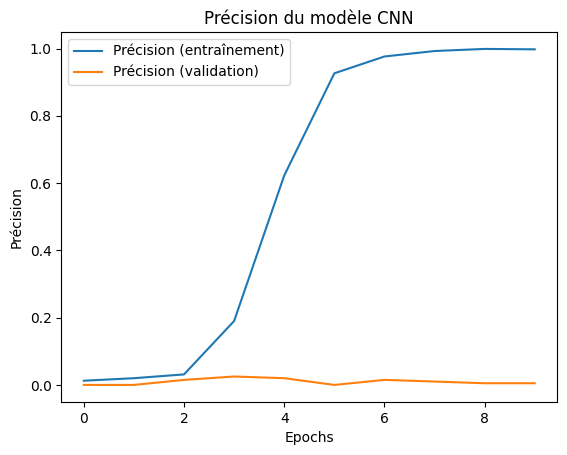

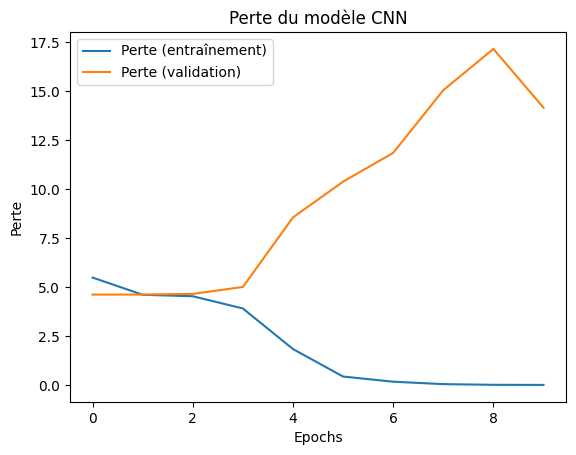

In [16]:
# Courbes de précision et de perte
plt.plot(history.history['accuracy'], label='Précision (entraînement)')
plt.plot(history.history['val_accuracy'], label='Précision (validation)')
plt.title('Précision du modèle CNN')
plt.xlabel('Epochs')
plt.ylabel('Précision')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Perte (entraînement)')
plt.plot(history.history['val_loss'], label='Perte (validation)')
plt.title('Perte du modèle CNN')
plt.xlabel('Epochs')
plt.ylabel('Perte')
plt.legend()
plt.show()


In [17]:
# Chemin vers les données de test
test_data_path = '/kaggle/input/food101tfrecords/food/test/'

# Charger les données de test depuis le chemin (si elles sont au format compatible)
# Supposons qu'il s'agit d'images et d'étiquettes dans un fichier similaire à celui utilisé précédemment.
# Implémente la méthode de chargement selon ton format exact.
# Exemple : Pour des images sous forme de fichiers, utilise ImageDataGenerator ou PIL pour les lire.


In [18]:
# Normalisation des données de test
X_test = X_test / 255.0

# Encodage des étiquettes
y_test = to_categorical(y_test, num_classes=num_classes)


In [20]:
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_test shape: (200, 384, 384, 3)
y_test shape: (200, 101, 101)


In [6]:
import h5py

# Chemin du fichier HDF5
h5_file = '/kaggle/input/food41/food_c101_n1000_r384x384x3.h5'

# Charger les données depuis le fichier
with h5py.File(h5_file, 'r') as f:
    images = f['images'][:] / 255.0  # Normaliser les images entre 0 et 1
    categories = f['category'][:]  # Charger les étiquettes

# Vérifier les formes des données
print(f"images shape: {images.shape}, categories shape: {categories.shape}")


images shape: (1000, 384, 384, 3), categories shape: (1000, 101)


In [7]:
from sklearn.model_selection import train_test_split

# Diviser les données en jeu d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(images, categories, test_size=0.2, random_state=42)

# Afficher les formes des jeux de données
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")


X_train shape: (800, 384, 384, 3), y_train shape: (800, 101)
X_val shape: (200, 384, 384, 3), y_val shape: (200, 101)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 382, 382, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 191, 191, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 189, 189, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 94, 94, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 92, 92, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 46, 46, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 270848)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    34,668,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 101)            │        13,029 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,774,949 (132.66 MB)

 Trainable params: 34,774,949 (132.66 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 173s 7s/step - accuracy: 0.0038 - loss: 5.9106 - val_accuracy: 0.0150 - val_loss: 4.6125
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 142s 6s/step - accuracy: 0.0193 - loss: 4.6114 - val_accuracy: 0.0250 - val_loss: 4.6148
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 141s 6s/step - accuracy: 0.0260 - loss: 4.5912 - val_accuracy: 0.0150 - val_loss: 4.6642
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 146s 6s/step - accuracy: 0.0547 - loss: 4.4003 - val_accuracy: 0.0000e+00 - val_loss: 4.8018
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 221s 7s/step - accuracy: 0.2312 - loss: 3.5023 - val_accuracy: 0.0200 - val_loss: 5.3724
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 148s 6s/step - accuracy: 0.6419 - loss: 1.6960 - val_accuracy: 0.0300 - val_loss: 8.2806
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 143s 6s/step - accuracy: 0.9012 - loss: 0.5148 - val_accuracy: 0.0300 - val_loss: 10.8701
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 143s 6s/step - accuracy: 0.9556 - loss: 0.2085 - val_accuracy: 0.040

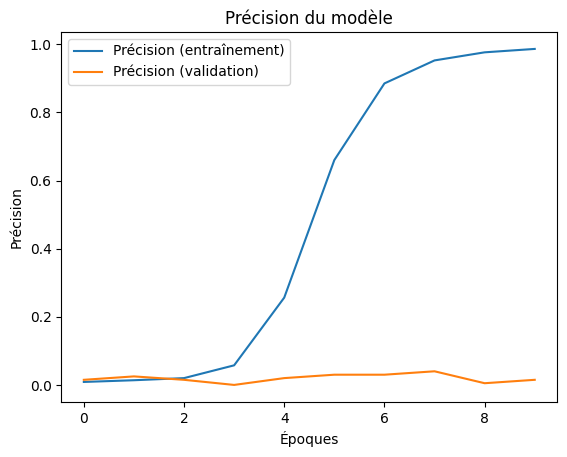

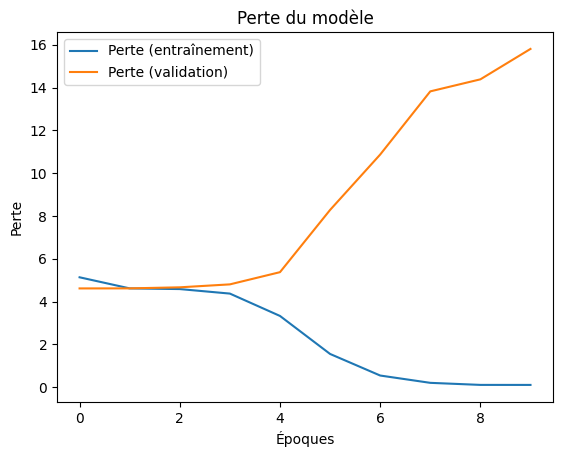

In [8]:
from tensorflow.keras import layers, models

# Définir le modèle CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(384, 384, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(101, activation='softmax')  # 101 classes
])

# Compiler le modèle
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Afficher un résumé du modèle
model.summary()

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Afficher les courbes de performance
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Précision (entraînement)')
plt.plot(history.history['val_accuracy'], label='Précision (validation)')
plt.title('Précision du modèle')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Perte (entraînement)')
plt.plot(history.history['val_loss'], label='Perte (validation)')
plt.title('Perte du modèle')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()


In [9]:
test_loss, test_accuracy = model.evaluate(X_val, y_val, batch_size=32)
print(f"Perte sur les données de validation : {test_loss}")
print(f"Précision sur les données de validation : {test_accuracy}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.0076 - loss: 16.5144
Perte sur les données de validation : 15.806435585021973
Précision sur les données de validation : 0.014999999664723873


In [10]:
import numpy as np

# Charger une image d'exemple depuis le jeu de validation
sample_image = X_val[0]  # Première image du jeu de validation
true_label = np.argmax(y_val[0])  # Label réel de cette image

# Ajouter une dimension pour prédiction
sample_image_expanded = np.expand_dims(sample_image, axis=0)

# Prédire
prediction = model.predict(sample_image_expanded)
predicted_label = np.argmax(prediction)

print(f"Label réel : {true_label}")
print(f"Label prédit : {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Label réel : 53
Label prédit : 27


In [22]:
image_path = "/kaggle/input/food41/images/apple_pie/1005649.jpg"  # Exemple pour Kaggle


In [23]:
image_path = "image.jpg"


In [24]:
import os
print(os.listdir("."))  # Lister les fichiers du répertoire courant


['.virtual_documents', 'mon_modele.h5']


In [30]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

# Chemin vers le dossier contenant les images
dataset_path = "/kaggle/input/food41/images/"

# Lister tous les fichiers et sous-dossiers dans le répertoire
all_files = os.listdir(dataset_path)
print(f"Tous les fichiers et sous-dossiers : {all_files[:5]}")  # Afficher un aperçu

# Filtrer uniquement les fichiers d'images (jpg, jpeg, png)
image_files = []
for item in all_files:
    item_path = os.path.join(dataset_path, item)
    # Si c'est un fichier et qu'il a l'extension d'une image
    if os.path.isfile(item_path) and item.endswith(('.jpg', '.jpeg', '.png')):
        image_files.append(item)
    # Si c'est un dossier, on explore les images dedans
    elif os.path.isdir(item_path):
        subfolder_files = os.listdir(item_path)
        for sub_item in subfolder_files:
            sub_item_path = os.path.join(item_path, sub_item)
            if os.path.isfile(sub_item_path) and sub_item.endswith(('.jpg', '.jpeg', '.png')):
                image_files.append(os.path.join(item, sub_item))

# Vérifier la liste des fichiers d'images
print(f"Images disponibles : {image_files[:5]}")  # Affichez un aperçu des fichiers

# Si des images sont trouvées, on les charge
if image_files:
    # Sélectionner une image à tester
    image_name = image_files[0]  # Charger la première image, ou remplacez par un nom précis
    image_path = os.path.join(dataset_path, image_name)

    # Charger et redimensionner l'image
    image = load_img(image_path, target_size=(384, 384))  # Adaptez la taille à celle utilisée par le modèle
    image_array = img_to_array(image)

    # Normaliser l'image
    image_array = image_array / 255.0

    # Ajouter une dimension pour le batch
    image_array = np.expand_dims(image_array, axis=0)

    print(f"Image '{image_name}' chargée et prétraitée !")

    # Prédire la classe avec le modèle
    predictions = model.predict(image_array)
    predicted_class = np.argmax(predictions, axis=1)[0]

    print(f"Classe prédite : {predicted_class}")
else:
    print("Aucune image trouvée dans le répertoire.")


Tous les fichiers et sous-dossiers : ['macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop']
Images disponibles : ['macarons/2428554.jpg', 'macarons/3842133.jpg', 'macarons/1963752.jpg', 'macarons/1075.jpg', 'macarons/2094416.jpg']
Image 'macarons/2428554.jpg' chargée et prétraitée !
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Classe prédite : 93


In [31]:
image_name = image_files[0]


In [33]:
image_name = "macarons/1963752.jpg"  # Remplacez par le chemin d'une image spécifique


In [34]:
for image_name in image_files[:10]:  # Tester les 10 premières images
    image_path = os.path.join(dataset_path, image_name)
    image = load_img(image_path, target_size=(384, 384))
    image_array = img_to_array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    predictions = model.predict(image_array)
    predicted_class = np.argmax(predictions, axis=1)[0]

    print(f"Image '{image_name}' -> Classe prédite : {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Image 'macarons/2428554.jpg' -> Classe prédite : 93
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Image 'macarons/3842133.jpg' -> Classe prédite : 75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Image 'macarons/1963752.jpg' -> Classe prédite : 75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Image 'macarons/1075.jpg' -> Classe prédite : 23
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Image 'macarons/2094416.jpg' -> Classe prédite : 75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Image 'macarons/397954.jpg' -> Classe prédite : 67
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Image 'macarons/124381.jpg' -> Classe prédite : 28
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Image 'macarons/407716.jpg' -> Classe prédite : 65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Image 'macarons/2844220.jpg' -> Classe prédite : 75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Image 'macarons/1736833.jpg' -> Classe prédite : 75


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


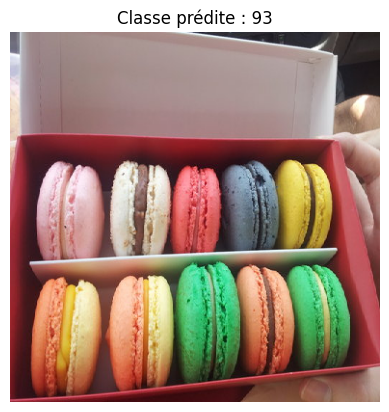

Image 'macarons/2428554.jpg' -> Classe prédite : 93
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


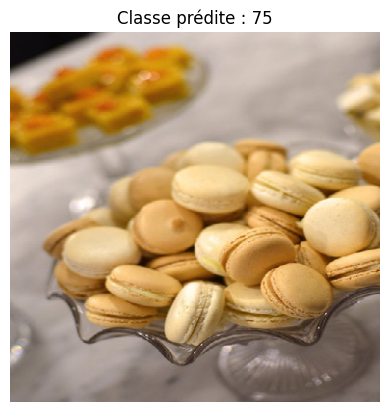

Image 'macarons/3842133.jpg' -> Classe prédite : 75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


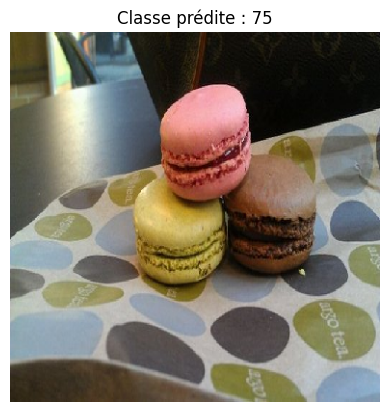

Image 'macarons/1963752.jpg' -> Classe prédite : 75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


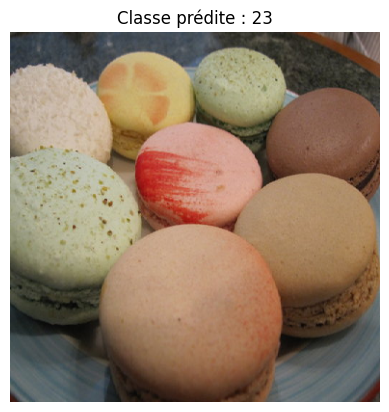

Image 'macarons/1075.jpg' -> Classe prédite : 23
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


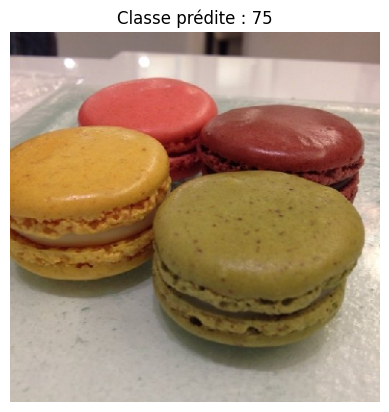

Image 'macarons/2094416.jpg' -> Classe prédite : 75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


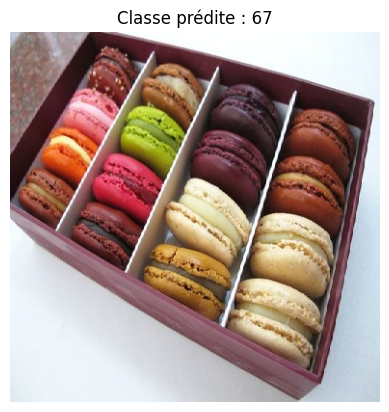

Image 'macarons/397954.jpg' -> Classe prédite : 67
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


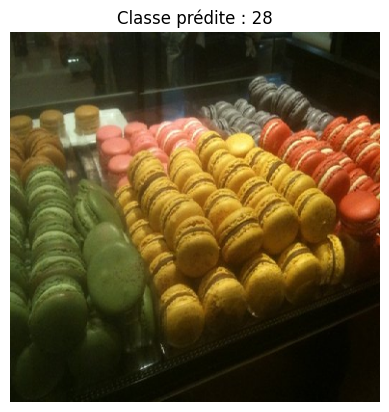

Image 'macarons/124381.jpg' -> Classe prédite : 28
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


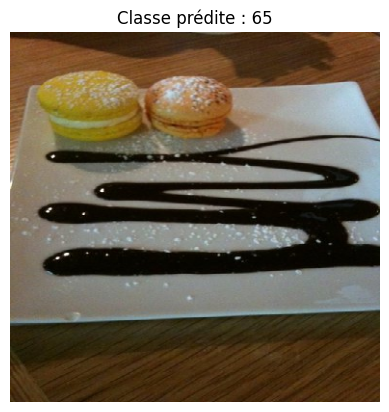

Image 'macarons/407716.jpg' -> Classe prédite : 65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


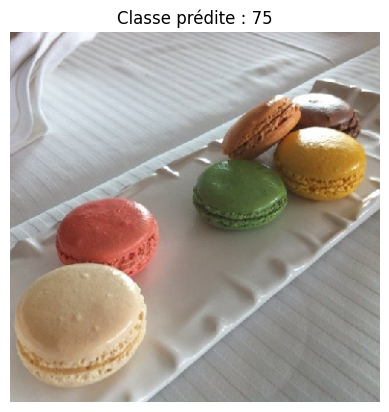

Image 'macarons/2844220.jpg' -> Classe prédite : 75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


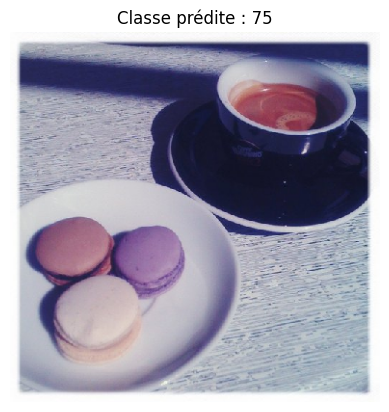

Image 'macarons/1736833.jpg' -> Classe prédite : 75


In [36]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

# Chemin vers le dossier contenant les images
dataset_path = "/kaggle/input/food41/images/"  # Remplacez par le chemin de votre dataset

# Lister les fichiers du dataset (ce sont des dossiers contenant les images)
image_files = []
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):  # Vérifier si c'est un dossier
        for image_name in os.listdir(folder_path):
            image_files.append(os.path.join(folder, image_name))

# Tester les 10 premières images
for image_path in image_files[:10]:
    # Charger l'image
    image = load_img(os.path.join(dataset_path, image_path), target_size=(384, 384))
    image_array = img_to_array(image) / 255.0  # Normaliser
    image_array = np.expand_dims(image_array, axis=0)

    # Prédire la classe avec le modèle
    predictions = model.predict(image_array)
    predicted_class = np.argmax(predictions, axis=1)[0]

    # Afficher l'image avec matplotlib
    plt.imshow(image)
    plt.axis('off')  # Enlever les axes pour une meilleure visualisation
    plt.title(f"Classe prédite : {predicted_class}")
    plt.show()

    # Afficher la classe prédite dans la console
    print(f"Image '{image_path}' -> Classe prédite : {predicted_class}")


In [38]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Chemin vers le dataset Food41 (Ingrédients)
dataset_food41 = "/kaggle/input/food41/images/"

# Lister les sous-dossiers dans le dataset
subfolders = os.listdir(dataset_food41)
print(f"Sous-dossiers disponibles : {subfolders[:5]}")  # Affiche un aperçu des sous-dossiers

# Sélectionner un sous-dossier et charger les images à l'intérieur
subfolder_name = subfolders[0]  # Remplacer par le sous-dossier désiré
subfolder_path = os.path.join(dataset_food41, subfolder_name)

# Lister les fichiers dans le sous-dossier
image_files = os.listdir(subfolder_path)
print(f"Images dans le sous-dossier '{subfolder_name}' : {image_files[:5]}")

# Sélectionner une image spécifique à tester
image_name = image_files[0]  # Charger la première image, ou remplace par un nom précis
image_path = os.path.join(subfolder_path, image_name)

# Charger et prétraiter l'image
image = load_img(image_path, target_size=(224, 224))  # Adapter la taille à ton modèle
image_array = img_to_array(image)
image_array = image_array / 255.0  # Normalisation

# Ajouter une dimension pour le batch
image_array = np.expand_dims(image_array, axis=0)

# Maintenant tu peux passer cette image dans ton modèle CNN pour prédire l'ingrédient


Sous-dossiers disponibles : ['macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop']
Images dans le sous-dossier 'macarons' : ['2428554.jpg', '3842133.jpg', '1963752.jpg', '1075.jpg', '2094416.jpg']


In [40]:
print(model.input_shape)  # Affiche la forme d'entrée du modèle


(None, 384, 384, 3)


In [41]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Charger l'image
image = load_img(image_path, target_size=(384, 384))  # Redimensionner à 384x384
image_array = img_to_array(image)  # Convertir l'image en tableau numpy
image_array = image_array / 255.0  # Normaliser l'image entre 0 et 1

# Ajouter une dimension pour le batch (1 image dans ce cas)
image_array = np.expand_dims(image_array, axis=0)

# Vérifier la forme des données avant de prédire
print(f"Forme de l'image après prétraitement : {image_array.shape}")

# Prédire la classe avec le modèle
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions, axis=1)[0]

print(f"Image '{image_name}' -> Classe prédite : {predicted_class}")


Forme de l'image après prétraitement : (1, 384, 384, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
Image '2428554.jpg' -> Classe prédite : 93


In [43]:
# Exemple d'une liste de classes
class_names = ['macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop', '...']  # Remplir avec toutes les classes

# Vérifie si l'indice est dans les limites de la liste des classes
if 0 <= predicted_class < len(class_names):
    predicted_class_name = class_names[predicted_class]
    print(f"Image '{image_name}' -> Classe prédite : {predicted_class_name}")
else:
    print(f"Erreur : L'indice de la classe prédite ({predicted_class}) est hors des limites.")


Erreur : L'indice de la classe prédite (93) est hors des limites.


In [44]:
class_names = [
    'class_0', 'class_1', 'class_2', 'class_3', ..., 'class_100'  # Remplir avec les noms des 101 classes
]


In [45]:
# Vérifie la taille de la liste des classes
print(f"Nombre de classes dans class_names : {len(class_names)}")
print(f"Classe prédite : {predicted_class}")

# Vérifie si l'indice est dans les limites de la liste des classes
if 0 <= predicted_class < len(class_names):
    predicted_class_name = class_names[predicted_class]
    print(f"Image '{image_name}' -> Classe prédite : {predicted_class_name}")
else:
    print(f"Erreur : L'indice de la classe prédite ({predicted_class}) est hors des limites.")


Nombre de classes dans class_names : 6
Classe prédite : 93
Erreur : L'indice de la classe prédite (93) est hors des limites.


In [46]:
class_names = [
    'macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop',  # Exemple des 5 premières
    # Ajoute les autres classes jusqu'à 101
]


In [47]:
# Vérifie que l'indice est dans la plage
if 0 <= predicted_class < len(class_names):
    predicted_class_name = class_names[predicted_class]
    print(f"Image '{image_name}' -> Classe prédite : {predicted_class_name}")
else:
    print(f"Erreur : L'indice de la classe prédite ({predicted_class}) est hors des limites.")


Erreur : L'indice de la classe prédite (93) est hors des limites.


In [48]:
print(model.output_shape)


(None, 101)


In [49]:
class_names = [
    'macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop',  # ... complète jusqu'à 101
    # Ajoute les autres classes ici
]


In [52]:
import os

# Vérifier les fichiers dans le répertoire meta/meta
meta_path = '/kaggle/input/food41/meta/meta'
files_in_meta = os.listdir(meta_path)
print("Fichiers dans meta/meta:", files_in_meta)


Fichiers dans meta/meta: ['test.txt', 'train.json', 'labels.txt', 'test.json', 'train.txt', 'classes.txt']


In [53]:
# Charger les noms des classes à partir du fichier classes.txt
class_file_path = os.path.join(meta_path, 'classes.txt')

with open(class_file_path, 'r') as f:
    class_names = f.readlines()

# Nettoyer les noms des classes (supprimer les espaces et les nouvelles lignes)
class_names = [name.strip() for name in class_names]
print(f"Les noms des classes : {class_names[:10]}")  # Afficher les 10 premières classes


Les noms des classes : ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


In [3]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Chemin du dataset Food41
dataset_food41 = '/kaggle/input/food41/images'

# Charger les noms des classes à partir du fichier classes.txt
meta_path = '/kaggle/input/food41/meta/meta'
class_file_path = os.path.join(meta_path, 'classes.txt')

with open(class_file_path, 'r') as f:
    class_names = f.readlines()

# Nettoyer les noms des classes
class_names = [name.strip() for name in class_names]
print(f"Classes chargées : {class_names[:10]}")  # Affiche les 10 premières classes

# Tester les images d'un sous-dossier
subfolder_name = 'macarons'  # Remplace par le sous-dossier que tu veux tester
subfolder_path = os.path.join(dataset_food41, subfolder_name)

if not os.path.isdir(subfolder_path):
    print(f"Erreur : le sous-dossier '{subfolder_name}' n'existe pas.")
else:
    # Lister les images dans le sous-dossier
    image_files = os.listdir(subfolder_path)
    print(f"Images dans le sous-dossier '{subfolder_name}' : {image_files[:5]}")  # Afficher les 5 premières images

    for image_name in image_files[:10]:  # Tester sur 10 images
        image_path = os.path.join(subfolder_path, image_name)
        print(f"Chemin de l'image : {image_path}")

        try:
            # Charger et prétraiter l'image
            image = load_img(image_path, target_size=(384, 384))  # Adapter la taille à ton modèle
            image_array = img_to_array(image) / 255.0  # Normalisation
            image_array = np.expand_dims(image_array, axis=0)

            # Prédire la classe avec le modèle
            predictions = model.predict(image_array)
            predicted_class = np.argmax(predictions, axis=1)[0]

            # Vérifier si l'indice prédit est valide
            if predicted_class < len(class_names):
                predicted_class_name = class_names[predicted_class]
                print(f"Image '{image_name}' -> Classe prédite : {predicted_class_name}")
            else:
                print(f"Image '{image_name}' -> Erreur : Classe prédite invalide (indice : {predicted_class}).")

        except FileNotFoundError:
            print(f"Erreur : L'image '{image_name}' n'a pas été trouvée.")
        except Exception as e:+
            print(f"Erreur inattendue avec l'image '{image_name}': {e}")




SyntaxError: invalid syntax (740912843.py, line 53)